In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [19]:
# ваш код
mintemp = df.groupby(by = df['Day'].dt.year).mean()['t'].idxmin()
maxtemp = df.groupby(by = df['Day'].dt.year).mean()['t'].idxmax()
print('min:', mintemp, 'max:', maxtemp)

min: 2012 max: 2015


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [30]:
# ваш код
year = df[(df['Day'].dt.month == 1) & (df['t']>=0)].groupby(by = df['Day'].dt.year).count()['t'].idxmax()
print(year)

2008


**3.** В каком году было самое холодное лето (по средней температуре)

In [31]:
# ваш код
year = df[(df['Day'].dt.month.isin([6, 7, 8]))].groupby(df['Day'].dt.year).mean()['t'].idxmin()
print(year)

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [38]:
# ваш код
day = df.iloc[df['t'].diff().abs().argmax() - 1]['Day']
print(day)

2014-05-26 00:00:00


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

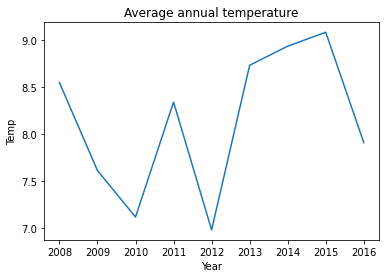

In [49]:
# ваш код
fig, ax = plt.subplots()
ax.plot(df['Day'].dt.year.unique(), df.groupby(by=df['Day'].dt.year).mean())
ax.set(xlabel='Year', ylabel='Temp', title='Average annual temperature')
plt.show()